## Using pandas to show a color-magnitude diagram

Some example code showing how I use pandas to plot a CMD of eclipsing binaries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def plotparams(ax):
    '''
    Basic plot params 

    :param ax: axes to modify

    :type ax: matplotlib axes object

    :returns: modified matplotlib axes object
    '''
    ax.minorticks_on()
    ax.yaxis.set_ticks_position('both')
    ax.xaxis.set_ticks_position('both')
    ax.tick_params(direction='in', which='both', labelsize=15)
    ax.tick_params('both', length=8, width=1.8, which='major')
    ax.tick_params('both', length=4, width=1, which='minor')
    for axis in ['top', 'bottom', 'left', 'right']:
        ax.spines[axis].set_linewidth(1.5)
    return ax

In [2]:
# Load in table

df = pd.read_csv('example_cmd_data.csv')

df

,id,period,type,parallax_over_error,phot_g_mean_mag,bp_rp,rpgeo,av,ag,abp,arp
0,J192257.71+631814.5,1.226074,EA,41.1071,15.362574,0.999535,1004.377500,1.261464,0.995295,1.263987,0.743002
1,J195014.55+075354.7,8.456654,EA,34.8482,13.167938,1.037289,1892.789920,0.000000,0.000000,0.000000,0.000000
2,J201846.64+493430.1,0.250020,EA,86.7612,15.337809,1.478963,488.877533,0.160920,0.126966,0.161242,0.094782
3,J024551.45-100344.5,0.359827,EA,38.8235,15.763462,1.727076,543.452393,0.660124,0.520838,0.661444,0.388813
4,J064811.14-115706.3,4.479821,EA,6.9418,15.498359,1.081438,3549.306880,0.730658,0.576489,0.732119,0.430358
...,...,...,...,...,...,...,...,...,...,...,...
135948,39356091,0.364974,EW,NaN,14.750182,0.858007,NaN,NaN,NaN,NaN,NaN
135949,39633063,0.295087,EW,NaN,15.478198,1.050495,NaN,NaN,NaN,NaN,NaN
135950,39634424,0.351763,EW,NaN,15.563156,1.102004,NaN,NaN,NaN,NaN,NaN
135951,36640298,0.304511,EW,NaN,13.683818,0.951263,NaN,NaN,NaN,NaN,NaN


We see that the data contains ~136k rows. The first three columns give the star id, the period of the binary, and the type of eclipsing binary. Some of the other column names are not very descriptive. We can rename them:

In [3]:
#Rename columns

df = df.rename(columns={'phot_g_mean_mag':'g_mag', 'rpgeo':'distance'})
df

,id,period,type,parallax_over_error,g_mag,bp_rp,distance,av,ag,abp,arp
0,J192257.71+631814.5,1.226074,EA,41.1071,15.362574,0.999535,1004.377500,1.261464,0.995295,1.263987,0.743002
1,J195014.55+075354.7,8.456654,EA,34.8482,13.167938,1.037289,1892.789920,0.000000,0.000000,0.000000,0.000000
2,J201846.64+493430.1,0.250020,EA,86.7612,15.337809,1.478963,488.877533,0.160920,0.126966,0.161242,0.094782
3,J024551.45-100344.5,0.359827,EA,38.8235,15.763462,1.727076,543.452393,0.660124,0.520838,0.661444,0.388813
4,J064811.14-115706.3,4.479821,EA,6.9418,15.498359,1.081438,3549.306880,0.730658,0.576489,0.732119,0.430358
...,...,...,...,...,...,...,...,...,...,...,...
135948,39356091,0.364974,EW,NaN,14.750182,0.858007,NaN,NaN,NaN,NaN,NaN
135949,39633063,0.295087,EW,NaN,15.478198,1.050495,NaN,NaN,NaN,NaN,NaN
135950,39634424,0.351763,EW,NaN,15.563156,1.102004,NaN,NaN,NaN,NaN,NaN
135951,36640298,0.304511,EW,NaN,13.683818,0.951263,NaN,NaN,NaN,NaN,NaN


In [4]:
# Drop rows with nan values

df = df.dropna(subset=['bp_rp', 'distance', 'av', 'parallax_over_error'])

df

,id,period,type,parallax_over_error,g_mag,bp_rp,distance,av,ag,abp,arp
0,J192257.71+631814.5,1.226074,EA,41.1071,15.362574,0.999535,1004.377500,1.261464,0.995295,1.263987,0.743002
1,J195014.55+075354.7,8.456654,EA,34.8482,13.167938,1.037289,1892.789920,0.000000,0.000000,0.000000,0.000000
2,J201846.64+493430.1,0.250020,EA,86.7612,15.337809,1.478963,488.877533,0.160920,0.126966,0.161242,0.094782
3,J024551.45-100344.5,0.359827,EA,38.8235,15.763462,1.727076,543.452393,0.660124,0.520838,0.661444,0.388813
4,J064811.14-115706.3,4.479821,EA,6.9418,15.498359,1.081438,3549.306880,0.730658,0.576489,0.732119,0.430358
...,...,...,...,...,...,...,...,...,...,...,...
135060,AV453638,0.341880,EW,26.6271,15.328442,0.873069,1624.784300,0.000000,0.000000,0.000000,0.000000
135061,AV449302,0.358010,EW,123.0988,13.304843,0.810967,667.489258,0.624513,0.492741,0.625762,0.367838
135063,AV521668,0.287820,EW,105.7257,14.095715,1.271095,509.487732,0.368607,0.290831,0.369345,0.217110
135064,AV507325,0.306960,EW,63.6677,14.309683,1.201809,639.105957,0.905505,0.714444,0.907316,0.533343


I am interested in making a plot showing the extinction-corrected color and absolute magnitude of these stars. To calculate the absolute magnitude, I want to use the equation

$$
M_G = g - 5\log_{10}(d)+5-A_G
$$

And to calculate the extinction corrected color:

$$
BP-RP = (BP-RP)_o - (A_{BP}-A_{RP})
$$

We can use these equations to define new rows in our dataframe

In [5]:
df['absolute_g'] = df.g_mag - 5*np.log10(df.distance)+5-df.ag
df['bp_rp_corrected'] = df.bp_rp - (df.abp-df.arp)

df

/home/rowan.90/anaconda3/envs/ebs/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/rowan.90/anaconda3/envs/ebs/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,id,period,type,parallax_over_error,g_mag,bp_rp,distance,av,ag,abp,arp,absolute_g,bp_rp_corrected
0,J192257.71+631814.5,1.226074,EA,41.1071,15.362574,0.999535,1004.377500,1.261464,0.995295,1.263987,0.743002,4.357794,0.478550
1,J195014.55+075354.7,8.456654,EA,34.8482,13.167938,1.037289,1892.789920,0.000000,0.000000,0.000000,0.000000,1.782426,1.037289
2,J201846.64+493430.1,0.250020,EA,86.7612,15.337809,1.478963,488.877533,0.160920,0.126966,0.161242,0.094782,6.764843,1.412503
3,J024551.45-100344.5,0.359827,EA,38.8235,15.763462,1.727076,543.452393,0.660124,0.520838,0.661444,0.388813,6.566817,1.454445
4,J064811.14-115706.3,4.479821,EA,6.9418,15.498359,1.081438,3549.306880,0.730658,0.576489,0.732119,0.430358,2.171152,0.779676
...,...,...,...,...,...,...,...,...,...,...,...,...,...
135060,AV453638,0.341880,EW,26.6271,15.328442,0.873069,1624.784300,0.000000,0.000000,0.000000,0.000000,4.274463,0.873069
135061,AV449302,0.358010,EW,123.0988,13.304843,0.810967,667.489258,0.624513,0.492741,0.625762,0.367838,3.689881,0.553043
135063,AV521668,0.287820,EW,105.7257,14.095715,1.271095,509.487732,0.368607,0.290831,0.369345,0.217110,5.269215,1.118860
135064,AV507325,0.306960,EW,63.6677,14.309683,1.201809,639.105957,0.905505,0.714444,0.907316,0.533343,4.567375,0.827835


Now we can try plotting everything

(8.5, -4.0)

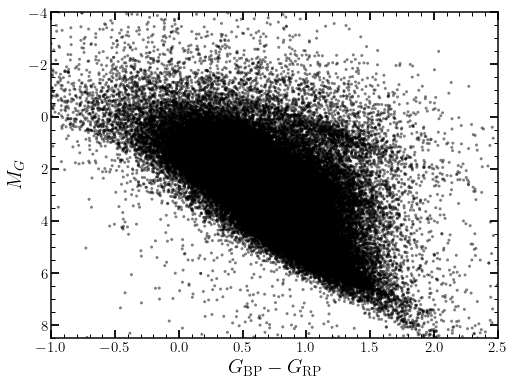

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax = plotparams(ax)

ax.scatter(df.bp_rp_corrected, df.absolute_g, 
           color='black', marker='.', edgecolor='none', alpha=0.5,
           rasterized=True)

ax.set_xlabel(r'$G_{\rm{BP}}-G_{\rm{RP}}$', fontsize=20)
ax.set_ylabel(r'$M_G$', fontsize=20)
ax.set_xlim(-1.0, 2.5)
ax.set_ylim(8.5, -4)

But chances are some of the data has poor distance estimates, has lots of extinction, or other problems. We can figure out which points we might want to cut. 

The parallax_over_error column is a good way to get rid of bad distance estimates. Lets cut everything with a value <10 in that column

In [7]:
df = df[df.parallax_over_error > 10]

We also want to get rid of stars that have high $A_V$. We can use 'describe' to see the range of values and 'quantile' to get a specific quantile

In [9]:
print(df.av.describe())
print('95th quantile: ', df.av.quantile(0.95))

count    105213.000000
mean          0.547456
std           0.612378
min           0.000000
25%           0.187740
50%           0.375480
75%           0.724140
max          24.976650
Name: av, dtype: float64
95th quantile:  1.6082153112729964


From this output we see that there are some stars with really high extinctions, so we probably want to get rid of them to clean up our plot. We can do something similar to what we did for the parallax_over_error cut

In [10]:
df = df[df.av < df.av.quantile(0.95)]

Lets try re-plotting:

(8.5, -4.0)

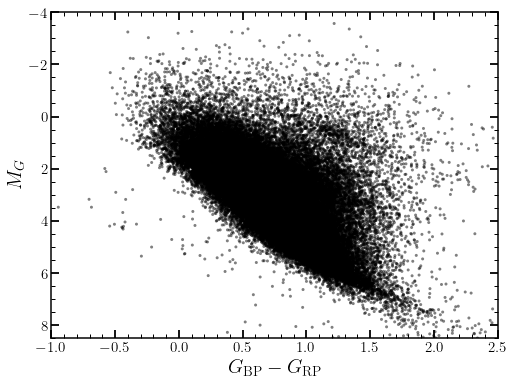

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax = plotparams(ax)

ax.scatter(df.bp_rp_corrected, df.absolute_g, 
           color='black', marker='.', edgecolor='none', alpha=0.5,
           rasterized=True)

ax.set_xlabel(r'$G_{\rm{BP}}-G_{\rm{RP}}$', fontsize=20)
ax.set_ylabel(r'$M_G$', fontsize=20)
ax.set_xlim(-1.0, 2.5)
ax.set_ylim(8.5, -4)

Compared to the earlier plot, we chopped off many of the stars at the top of the CMD, and stars below the main sequence. As a final example, we can see how this figure differs for the different 'type' column values

In [12]:
df.type.value_counts()

EW    54010
EA    28869
EB    17073
Name: type, dtype: int64

EW stars are contact binaries -- two stars that have filled their roche lobes and are in contact. EAs are detached binaries, so the opposite scenario. EBs are semi-detached, so somewhere in the middle of EW and EA. We might guess that the orbital period of these systems is different. We can make a quick histogram to show this:

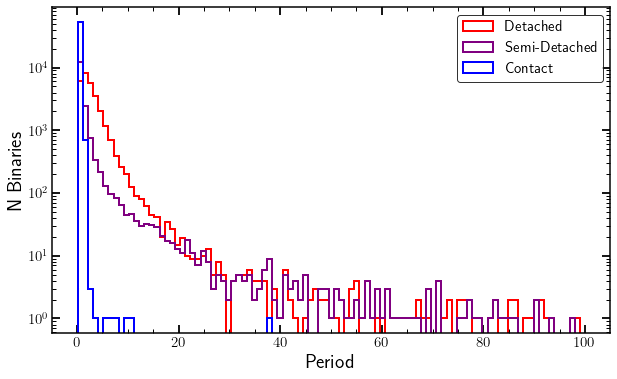

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax = plotparams(ax)

bins = np.linspace(df.period.min(), 100, 100) # get the minimum value to set histogram bins

ax.hist(df[df.type == 'EA'].period, color='red', histtype='step', lw=2, bins=bins, label='Detached')
ax.hist(df[df.type == 'EB'].period, color='purple', histtype='step', lw=2, bins=bins, label='Semi-Detached')
ax.hist(df[df.type == 'EW'].period, color='blue', histtype='step', lw=2, bins=bins, label='Contact')

ax.set_xlabel('Period', fontsize=20)
ax.set_ylabel('N Binaries', fontsize=20)

ax.legend(loc='upper right', edgecolor='black', fontsize=15)

ax.set_yscale('log')

Finally, we can plot just the contact binaries. This uses a slightly different way to index the df

(8.5, -4.0)

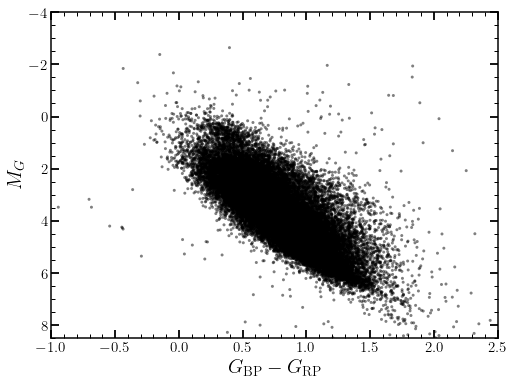

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax = plotparams(ax)

idx_contact = np.where(df.type == 'EW')[0]

ax.scatter(df.bp_rp_corrected.iloc[idx_contact], df.absolute_g.iloc[idx_contact], 
           color='black', marker='.', edgecolor='none', alpha=0.5,
           rasterized=True)

ax.set_xlabel(r'$G_{\rm{BP}}-G_{\rm{RP}}$', fontsize=20)
ax.set_ylabel(r'$M_G$', fontsize=20)
ax.set_xlim(-1.0, 2.5)
ax.set_ylim(8.5, -4)